# Cobweb plots for the 2x mod 1 map

In [1]:
# A code to iterate the map "f" "n" times starting from "x0"
f(x) = mod(2*x,1)
x0 = 2//7
n = 20
data = zeros(2*n,2)
for i in 1:n
    print(x0,"\n")
    x0 = f(x0)
    data[2*i - 1, 1] = x0
    data[2*i - 1, 2] = f(x0)
    data[2*i, 1] = f(x0)
    data[2*i, 2] = f(x0)
end

2//7
4//7
1//7
2//7
4//7
1//7
2//7
4//7
1//7
2//7
4//7
1//7
2//7
4//7
1//7
2//7
4//7
1//7
2//7
4//7


In [3]:
using Plots

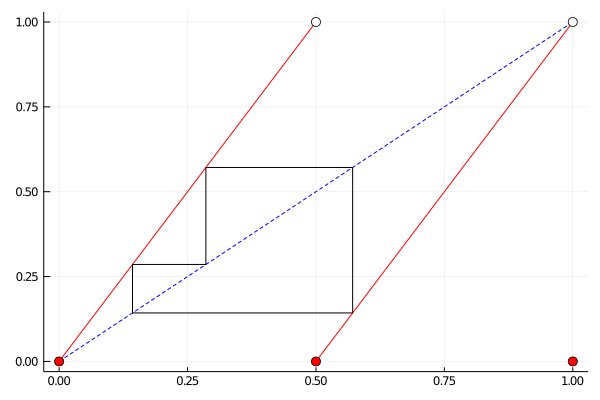

In [4]:
# plot the iterations with 2x mod 1 map
g1(x) = 2*x
g2(x) = 2*x - 1
g3(x) = x
plot(g1, 0, 0.5, color = :red)
plot!(g2, 0.5, 1, color = :red)
plot!(g3, 0, 1, linestyle = :dash, color = :blue)
scatter!([(0,0),(0.5,0),(1,0)],markershape = :circle, markersize = 5, markercolor = :red)
scatter!([(0.5,1.0),(1.0,1.0)],markershape = :circle, markersize = 5, markercolor = :white)
plot!(data[:,1],data[:,2], color=:black, legend=false)

## Plot periodic orbits with periods upto 4

In [146]:
# A function to compute "n" iterations of the map "f" starting from point "x0"
function iterations(f,x0,n)
    data = zeros(2*n,2)
    for i in 1:n
        x0 = f(x0)
        data[2*i - 1, 1] = x0
        data[2*i - 1, 2] = f(x0)
        data[2*i, 1] = f(x0)
        data[2*i, 2] = f(x0)
    end
    return data
end

iterations (generic function with 1 method)

In [147]:
# A function to plot the cobweb generated by iterations()
function plot2xmod1(data)
    g1(x) = 2*x
    g2(x) = 2*x - 1
    g3(x) = x
    plot(g1, 0, 0.5, color = :red)
    plot!(g2, 0.5, 1, color = :red)
    plot!(g3, 0, 1, linestyle = :dash, color = :blue)
    scatter!([(0,0),(0.5,0),(1,0)],markershape = :circle, markersize = 5, markercolor = :red)
    scatter!([(0.5,1.0),(1.0,1.0)],markershape = :circle, markersize = 5, markercolor = :white)
    plot!(data[:,1],data[:,2], color=:black, legend=false)
end

plot2xmod1 (generic function with 1 method)

In [148]:
# Iterate the map using iterations() and plot the cobweb using plot2xmod1()

#period 2: 1/3
#period 3: 2/7, 3/7
#period 4: 7/15, 8/15, 9/15

data21 = iterations(f, 1//3, 100);
plot21 = plot2xmod1(data21);

data31 = iterations(f, 2//7, 100);
plot31 = plot2xmod1(data31);
data32 = iterations(f, 3//7, 100);
plot32 = plot2xmod1(data32);

data41 = iterations(f, 7//15, 100);
plot41 = plot2xmod1(data41);
data42 = iterations(f, 8//15, 100);
plot42 = plot2xmod1(data42);
data43 = iterations(f, 9//15, 100);
plot43 = plot2xmod1(data43);

### Period 2 orbit

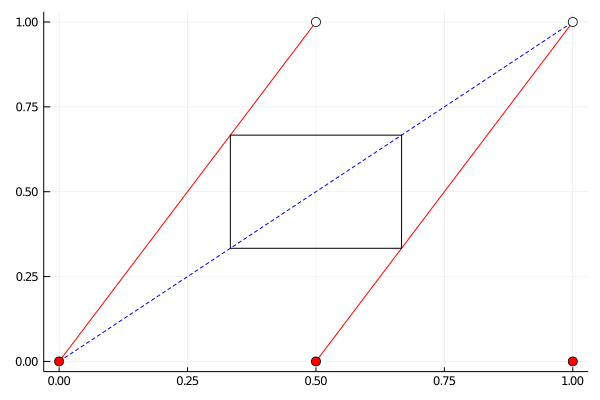

In [149]:
plot(plot21, layout = 1)

### Period 3 orbits

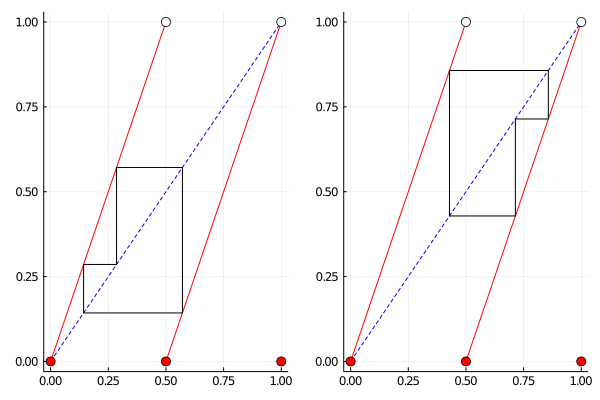

In [150]:
plot(plot31,plot32, layout = 2)

### Period 4 orbits

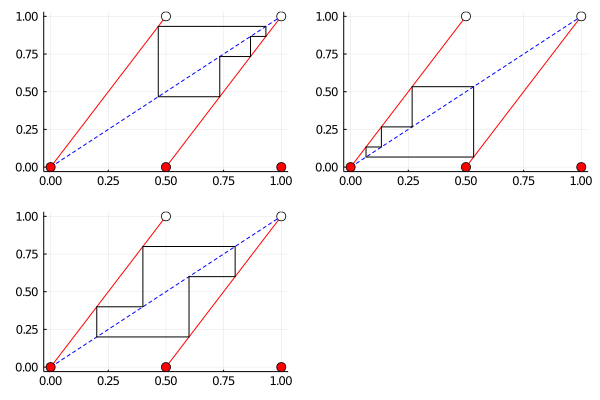

In [151]:
plot(plot41,plot42,plot43, layout = 3)

1. Given a rational number, can you determine or express in closed form the period of its periodic orbit?

If the number has the form $1/(2^n - 1)$, then period is certainly $n$. Thence, if the number has a form $2^m/(2^n - 1)$ where $m<n$, the period will remain $n$. 

2. If not, can you give an upper bound on the period?

An upper bound on the period of a rational number of the form $p/q$ is $q-1$. Another candidate for a tighter upper bound seems to be the number of coprimes of $q$ less than $q$. If $q$ has a prime factorisation given by $q = a^m * b^n$, then no of coprimes of $q$ less than $q$ are $a^{(m-1)}(a-1)*b^{(n-1)}(b-1)$

3. Can you related the dynamics of the periodic orbits to number theory?

It should be related to modular arithmetic but I am not sufficiently aware of ideas in number theory to further comment on this question.

4. Are there periodic orbits of all integer periods greater than or equal to 2?

Yes. For any period $n$, one can construct a binary string of $n-1$ zeros and a $1$ following a decimal. This pattern can then repeat indefinitely and will therefore constitute a point on the periodic orbit with period $n$. Consequently, this point, given by $1/(2^n -1)$ in base 10, will certainly lie on a periodic orbit of period $n$.

5. How many orbits are there for a given period? If not an explicit formula, how about an upper bound?

If the period $p$ is prime, the number of periodic orbits are given by $\frac{2^p - 2}{p}$ (to see this, consider $p$ places which might be filled with a zero or a one resulting in $2^p$ combinations. All these patterns can be repeated infinitely in bit strings to generate periodic orbits except all zeros and all ones, hence subtract $2$. Finally divide by the number of possible shifts i.e. $p$)

If $p$ is non-prime, then $\frac{2^p - 2}{p}$ acts as an upper bound.

6. We have a criterion for stability/instability of a fixed point of a map based on the derivative of f at the fixed point. Can you come up with a similar criterion for the stability/instability f a periodic orbit?

Finding stability of a periodic orbit of map $f(x)$ with period $p$ is equivalent to finding the stability of any fixed point (say $\hat{x}$) on this orbit under the map $f^p(x)$. Hence the periodic orbit will be stable iff $|f^{p\prime}(\hat{x})| < 1$

***

*Pulkit Dubey*